In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [62]:
data = pd.read_csv('C:\\Users\\User\\Downloads\\Data\\train.csv', usecols=['Survived', 'Pclass','Age', 'Sex'])

In [63]:
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [64]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [65]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
tr = ColumnTransformer([
    ('encode',OneHotEncoder(drop='first',sparse_output=False),[1]),
    ('impute', SimpleImputer(),[2])
],remainder='passthrough')

In [68]:
x_train = tr.fit_transform(x_train)
x_test = tr.transform(x_test)

In [69]:
dc = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [13]:
def decisionTree_hyperparameter_analyze(max_depth=None,criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None):
    dc = DecisionTreeClassifier(
        max_depth = max_depth,
        criterion = criterion,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_leaf_nodes = max_leaf_nodes
    )
    dc.fit(x_train,y_train)
    y_pred = dc.predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    print(f"Accuracy is : {ac}")
    print(dc.get_depth())
    
    
    
    plt.figure(figsize=(12, 10))
    tree.plot_tree(dc, fontsize=10, filled=True)
    plt.show()
    

Accuracy is : 0.8059701492537313
3


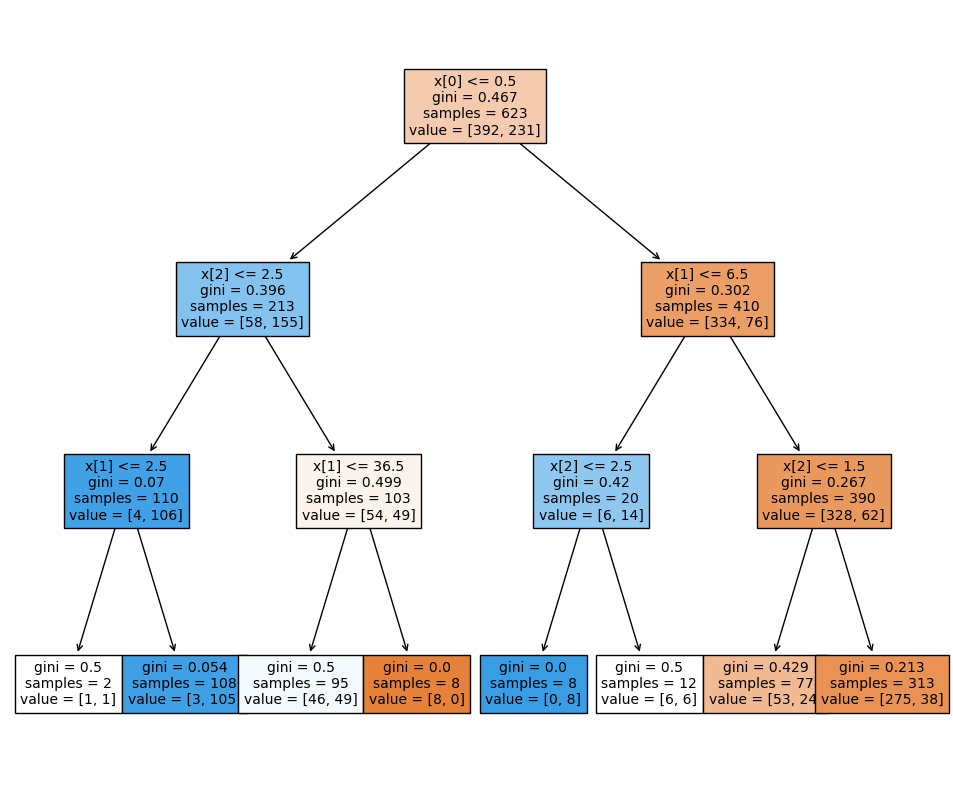

In [14]:
decisionTree_hyperparameter_analyze(max_depth=3)

<h1>Description of Hyperparameters:</h1>
<ol>
    <li>Criterion</li>
    <li>max_depth</li>
    <li>min_samples_split</li>
    <li>min_samples_leaf</li>
    <li>max_leaf_node</li>
<ol>